# Instalacja i import bibliotek



In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_md

2023-09-24 11:05:31.449529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 11:05:32.476452: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-24 11:05:33.814370: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-24 11:05:33.814850: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

## Importy bibliotek

Następnie zaimportujemy bibliotekę pandas do pracy ze zbiorami danych:
```
import pandas as pd
```

Matplotlib będzie do rysowania wykresów:
```
import matplotlib.pyplot as P
```

Bibliotek seaborn jest rozszerzeniem Matplotlib ułatwiających niektóre obliczenia:
```
import seaborn as sns
```

Spacy to przetwarzania języka:
```
import spacy
```

Moduł Pythonowy do wyrażeń regularnych:
```
import re
```

Wordcloud do rysowania chmur tagów:
```
from wordcloud import WordCloud
```

Progressbary:
```
from tqdm import tqdm
tqdm.pandas()
```

Oraz scikit-learn do klasyfikacji:
```
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
```

In [ ]:
import pandas as pd
import matplotlib.pyplot as P
import seaborn as sns
import spacy
import re
from wordcloud import WordCloud
from tqdm import tqdm
tqdm.pandas()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

# Wczytywanie danych



In [ ]:
names = ['target','ids','date','flag','user','text']
data = pd.read_csv("Sentiment_Data.csv", names=names)
data.sample(5)

,target,ids,date,flag,user,text
464785,0,2175202431,Mon Jun 15 00:21:03 PDT 2009,NO_QUERY,ddanniellexo,@ttaasshhaa ahhhhhhhhhhhhhhh the show JONAS my...
1133410,4,1976168317,Sat May 30 16:44:13 PDT 2009,NO_QUERY,sissylyn411,@taylorswift13 LOOK OUT..FLOOR 8th ROW@MSG AUG...
1279005,4,2001488704,Tue Jun 02 01:03:00 PDT 2009,NO_QUERY,xoTUSHYxo,I love those sonic drivein commercials... ther...
736128,0,2264941352,Sun Jun 21 05:22:10 PDT 2009,NO_QUERY,tzspiros,eating in Emirates lounge in Incheon airport (...
422827,0,2062738997,Sun Jun 07 00:08:34 PDT 2009,NO_QUERY,aderion,@LOLCarrie AA has very bad habits: he move ba...


Rozmiar tabeli danych

In [ ]:
data.shape

(1600000, 6)

Metody `info` żeby się więcej dowiedzieć o typach danych i rozmiaru w pamięci.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Metoda `nunique` zlicza ile jest różnych wartości w każdej kolumnie, ale jeśli najpierw użyjemy metody `groupby` żeby zgrupować dane po kolumnie `target` zobaczymy ile jest jakich klas w zbiorze.

In [ ]:
data.groupby('target').nunique()

,ids,date,flag,user,text
target,,,,,
0,800000,593879,1,415671,790185
4,800000,286578,1,376569,793506


Wyświetlić obrazowo używając metody `countplot` z biblioteki seaborn.

<Axes: xlabel='target', ylabel='count'>

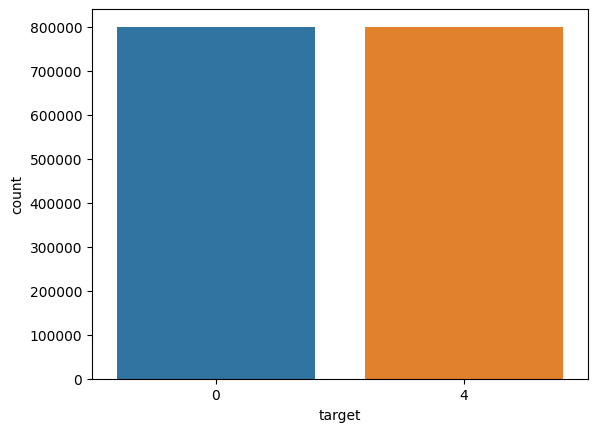

In [ ]:
sns.countplot(x='target', data=data)

Wyświetlenie kilku losowych przykładów z każdej klasy:

In [ ]:
data[data['target']==4].sample(5)

,target,ids,date,flag,user,text
1422038,4,2058430269,Sat Jun 06 14:55:38 PDT 2009,NO_QUERY,laurenliscio,With my family.
1089477,4,1969702194,Sat May 30 00:55:20 PDT 2009,NO_QUERY,heartbeat1,Not seeing the potential of all this FREE traf...
1176577,4,1981279732,Sun May 31 08:49:12 PDT 2009,NO_QUERY,MacSheikh,"@binmugahid That's a good plan, too."
1435509,4,2060821383,Sat Jun 06 19:38:36 PDT 2009,NO_QUERY,DeannaStrong,Is home from a hot date night.
1232108,4,1991889298,Mon Jun 01 07:50:30 PDT 2009,NO_QUERY,schmae,@jpuvan No fine. Just renewal fees.


In [ ]:
data[data['target']==0].sample(5)

,target,ids,date,flag,user,text
302704,0,1999137410,Mon Jun 01 19:42:19 PDT 2009,NO_QUERY,kris_ilovemiley,I miss you poppy I wish I got to say goodbye ...
517553,0,2191323142,Tue Jun 16 05:01:50 PDT 2009,NO_QUERY,janelleee22,@AngieeVittor21 i know!! im horrible!! i WILL...
589407,0,2216979248,Wed Jun 17 20:13:36 PDT 2009,NO_QUERY,kin_meng,Ouch! Stomach ache..
668515,0,2245961692,Fri Jun 19 16:53:39 PDT 2009,NO_QUERY,tarrahartl,No Devils Lake for us tomorrow Our basement ...
113238,0,1825742000,Sun May 17 06:42:05 PDT 2009,NO_QUERY,Hawlaii,@Jazzminnie I don't think this'll work Cash C...


# Preprocessing

Zaczynam od czyszczenia danych. Utworzenie nowej tabeli tylko kolumny `text` i `target`, a w kolumnie `target` zmieniono wartość 4 na 1, przy użyciu metody `replace` z parameterem `inplace` ustawionym na `True`.

In [ ]:
data = data[['text', 'target']]

data['target'].replace(4,1,inplace=True)
data.sample(5)

<ipython-input-13-6fe096b5d15a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'].replace(4,1,inplace=True)


,text,target
522609,@ConservaTeacher Where has our country gone? S...,0
1317642,"@tweetnotpurge1 i know,i'm very dumb,such a sh...",1
185697,I hope my mom and the baby are ok with this st...,0
1472124,@tommcfly when r u guys coming to jersey? gd l...,1
599657,"@SimnY pony! im doing SAT prep this summer ew,...",0


Następnie zamieniono wszystkie teksty w kolumnie `text` na małe litery (metodą `str.lower()`).

In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.sample(5)

,text,target
399177,"@annebeanva oh, i'm so sorry. you and your fam...",0
1223230,@bigassbadger had to take mum to the hospital ...,1
670879,my headache has gotten so bad i guess thats w...,0
1262873,@redlisainfo oh no i like it more than fb. i j...,1
957229,jedi - the miracle of your existance is most d...,1


Użyto biblioteki [re](https://docs.python.org/3/library/re.html) żeby usunąć z tekstu wszystkie URLe - np. wszystkie tokeny oddzielone spacją zaczynające się od `www.` albo `http(s)://`.

In [ ]:
re_url = re.compile(r"((www.[^\s]+)|(https?://[^\s]+))")

data['text'] = data['text'].apply(lambda x: re_url.sub('', x))

Nastepnie usunięto wyrażeniami regularnymi wszystkie znaki z tekstu oprócz:
* liter alfabetu
* białych znaków (klasa `\s`)
* apostrofu `'` (chodzi o angielskie skracanie, np don't albo isn't)

In [ ]:
re_letters = re.compile(r"[^a-z\s']")

data['text'] = data['text'].apply(lambda x: re_letters.sub('', x))
data.sample(5)

,text,target
509742,i feel like throwing up,0
662923,youtube is down for maintenance and will be ba...,0
329902,sadly uf is about to lose to washington ugh th...,0
331092,dominiclopez detective is a fun game until you...,0
569403,not doing much because facebook won't work,0


Następnie wczytano model `en_core_web_md` z biblioteki spacy.

In [ ]:
nlp = spacy.load('en_core_web_md', disable=['ner', 'parser'])
nlp.add_pipe('sentencizer')

Usunięcie stop words

Obejrzyj listę słów `nlp.Defaults.stop_words`.

In [ ]:
nlp.Defaults.stop_words

In [ ]:
def remove_stopwords(text):
  return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))

data['text'] = data['text'].apply(remove_stopwords)
data.sample(5)

,text,target
1491001,lisitening master shortie youtube,1
290349,tired school feeling little weather,0
200443,i'm exhausted ugh,0
656822,laurenfisch let's pickup don't deliver i'm try...,0
23416,person tour night commented poken forgot bring,0


In [ ]:
data.drop_duplicates(subset='text', keep='first', inplace=True)

In [ ]:
a=data[data['target']==1].sample(10000)
b=data[data['target']==0].sample(10000)
data20k = pd.concat([a,b])

Tokenizacja i lematyzacja

In [ ]:
zdanie = 'she likes apples'

for slowo in nlp(zdanie):
  print(slowo.lemma_)

she
like
apple


In [ ]:
def lemmatize(text):
  return ' '.join([x.lemma_ for x in nlp(text)])

data20k['text'] = data20k['text'].progress_apply(lemmatize)
data20k.sample(10)

100%|██████████| 20000/20000 [01:12<00:00, 275.60it/s]


,text,target
1298536,shop free day shopping,1
960069,eurovision congrat norway good job ella,1
611043,feel pain feel day call ugggg miss jo,0
977210,star trek cool b watch night chris pine quotgt,1
1384529,stewartkris u n s hi australia way lol,1
338764,take hour home half time wait friggin bus supp...,0
1269303,bit lunch time frisbee today new aerobie take ...,1
1202555,watch mtv moooovie awards,1
1120312,noteam spending day grandson'swill later tonig...,1
1044494,miss alreaddddyyy goodnight twitterlaaand,1


## Chmury słów



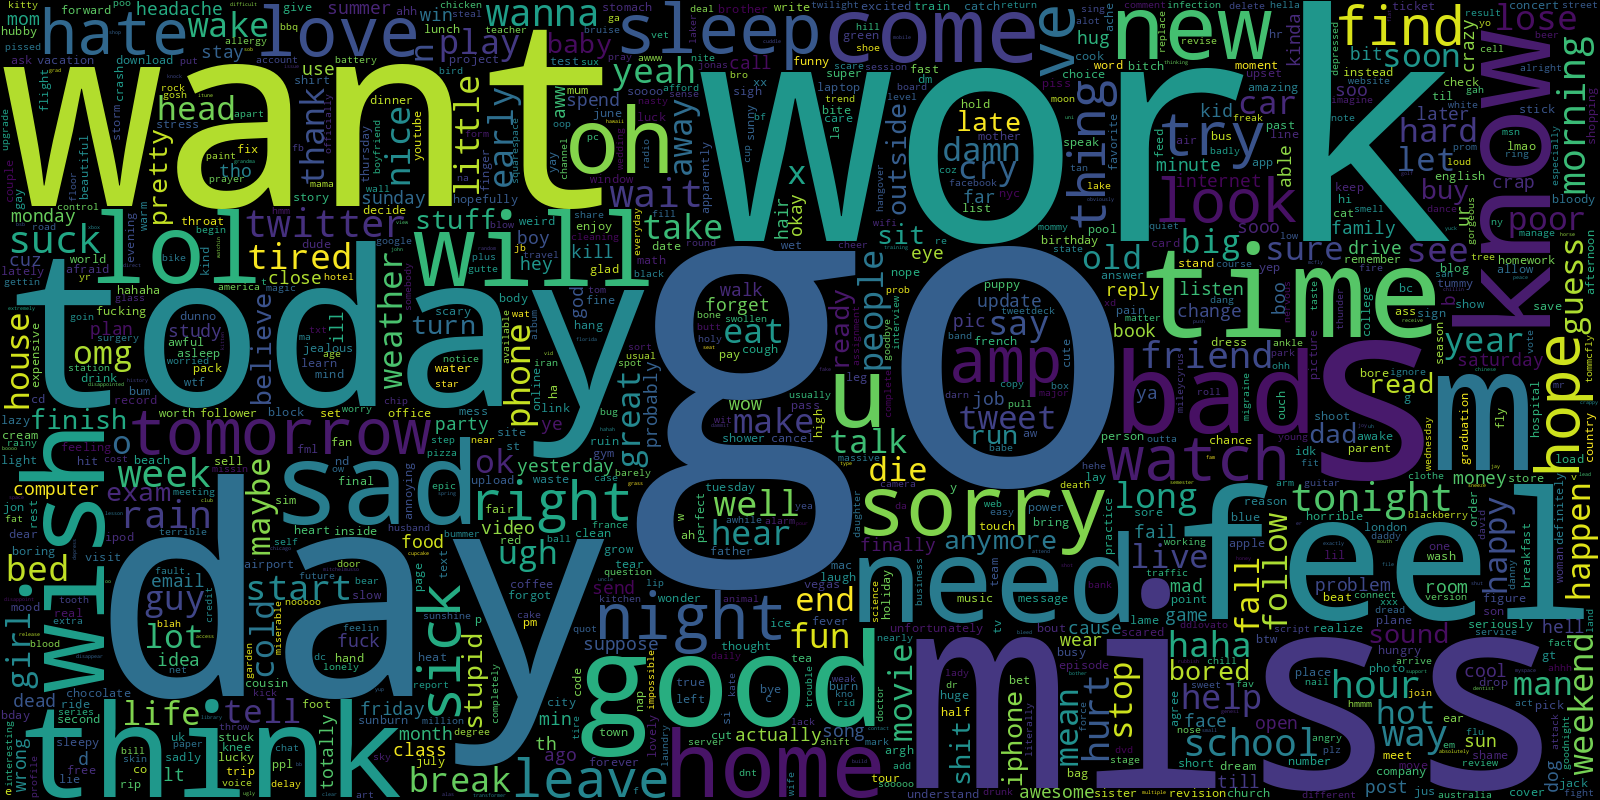

In [ ]:
text_neg = ' '.join(data20k[data20k['target']==0]['text'])

wc_neg = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(text_neg)
wc_neg.to_image()

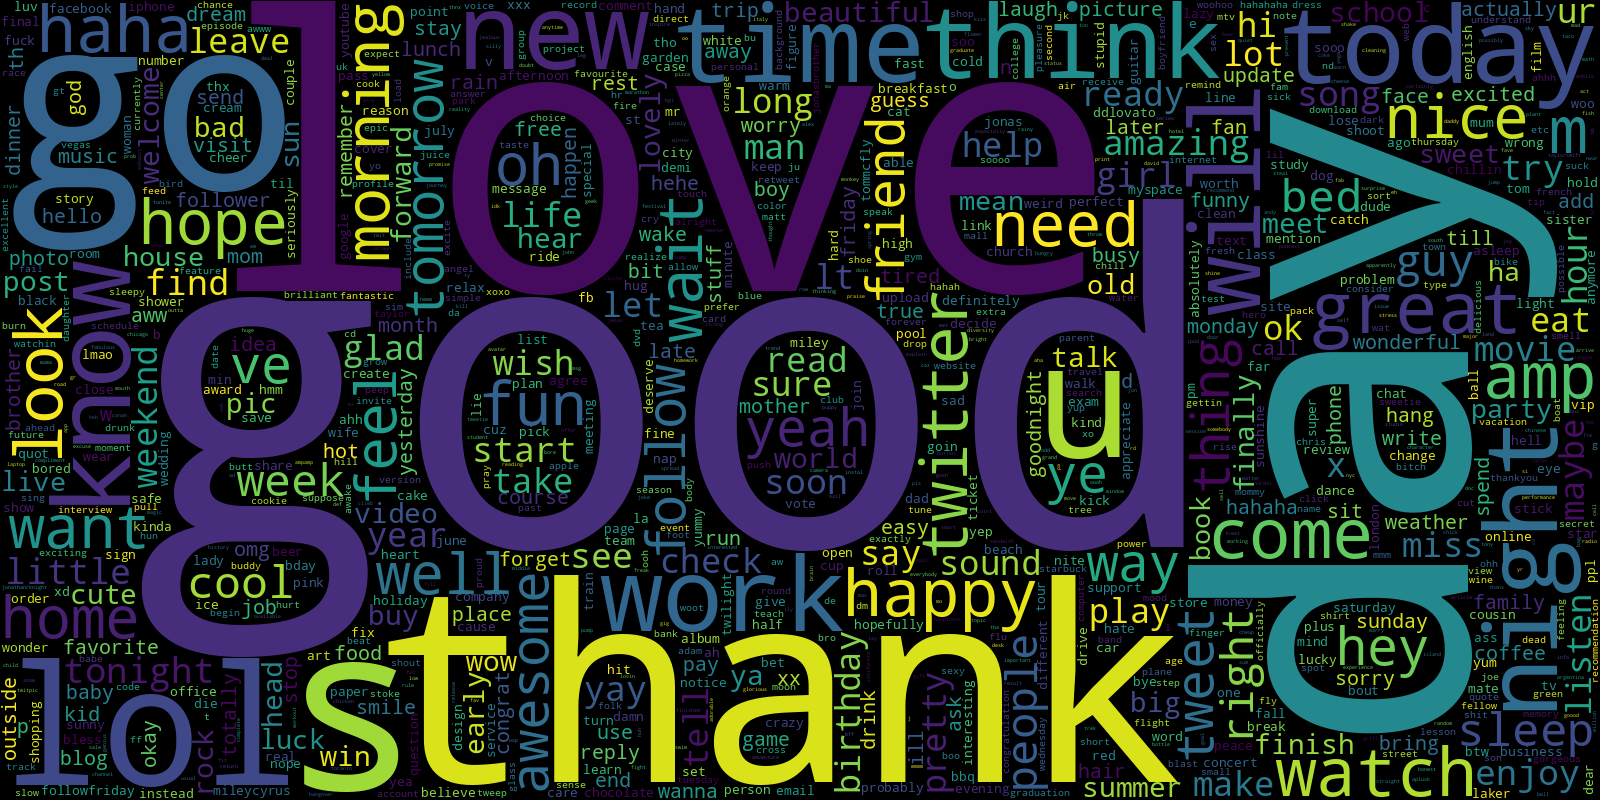

In [ ]:
text_pos = ' '.join(data20k[data20k['target']==1]['text'])

wc_pos = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(text_pos)
wc_pos.to_image()

# Klasyfikacja



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data20k.text, data20k.target, test_size=0.1, stratify=data20k.target)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
len(vectorizer.get_feature_names_out())

116008

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(18000, 116008)
(2000, 116008)


In [ ]:
print(X_train)

  (0, 91224)	0.36017767900372955
  (0, 91216)	0.4225760952447654
  (0, 12181)	0.41744653038787666
  (0, 12179)	0.4006964651283272
  (0, 8515)	0.5511719285483172
  (0, 7529)	0.2304164177229755
  (1, 109923)	0.34358480266871405
  (1, 109907)	0.18315515940156235
  (1, 100135)	0.3579474646029721
  (1, 99927)	0.15188978083733673
  (1, 67245)	0.3579474646029721
  (1, 67242)	0.31903166991823617
  (1, 57816)	0.2235010547662244
  (1, 57751)	0.1674587801039475
  (1, 33777)	0.3579474646029721
  (1, 33710)	0.21972912421037594
  (1, 9359)	0.2763837231016606
  (1, 9190)	0.31903166991823617
  (1, 9076)	0.18635336173742312
  (2, 101186)	0.1847460896052742
  (2, 101184)	0.4145631961019389
  (2, 100991)	0.25802220364529505
  (2, 67474)	0.18848599769236069
  (2, 67275)	0.09274899221638216
  (2, 66860)	0.5968932371865726
  :	:
  (17998, 100991)	0.15177549170749047
  (17998, 88418)	0.20151887215941278
  (17998, 75618)	0.35110840575335783
  (17998, 75610)	0.30092684225397875
  (17998, 72154)	0.3326173628731

## Właściwa klasyfikacja - BernoulliNB, czyli Naive Bayes


In [ ]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1000
           1       0.72      0.74      0.73      1000

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000

